In [0]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 8.0)

In [0]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True);
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False);

0it [00:00, ?it/s]

9920512it [00:01, 8692278.82it/s]                            


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 129039.51it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


1654784it [00:00, 2132852.62it/s]                            
0it [00:00, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


8192it [00:00, 48768.42it/s]            


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


In [0]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

print(X_train[0, :, :]);

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [0]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [0]:
X_train = X_train.float()
X_test = X_test.float()

In [0]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [0]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

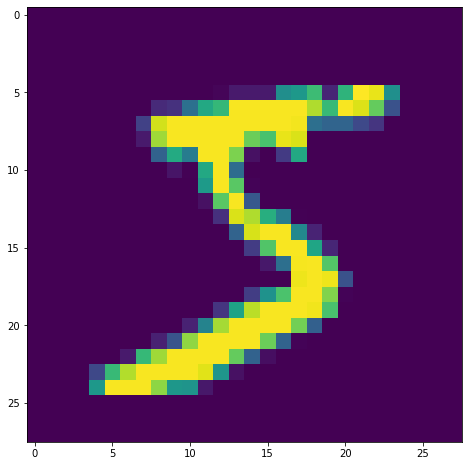

tensor(5)


In [0]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [0]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [0]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(1000)

In [0]:
torch.cuda.is_available()

True

In [0]:
!nvidia-smi

Mon Dec  9 12:54:15 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     7W /  75W |     10MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)
list(mnist_net.parameters())

[Parameter containing:
 tensor([[-0.0003,  0.0192, -0.0294,  ...,  0.0219,  0.0037,  0.0021],
         [-0.0198, -0.0150, -0.0104,  ..., -0.0203, -0.0060, -0.0299],
         [-0.0201,  0.0149, -0.0333,  ..., -0.0203,  0.0012,  0.0080],
         ...,
         [-0.0289,  0.0347,  0.0330,  ...,  0.0019,  0.0281, -0.0245],
         [ 0.0332, -0.0036, -0.0178,  ...,  0.0165,  0.0101,  0.0109],
         [-0.0083, -0.0320,  0.0191,  ...,  0.0285,  0.0020,  0.0124]],
        device='cuda:0', requires_grad=True), Parameter containing:
 tensor([-2.4585e-02,  2.1331e-02, -7.6265e-03,  9.2355e-03,  1.5860e-02,
         -2.6515e-02, -9.7204e-03,  1.5063e-02, -1.7937e-02,  3.7417e-03,
          2.0099e-02,  2.0529e-03, -1.6302e-02, -7.7638e-03,  3.0432e-02,
         -5.8678e-03, -3.0080e-02, -1.1797e-02, -2.2232e-03, -3.4560e-02,
         -2.1814e-02, -2.4185e-02,  2.2240e-02, -1.8351e-02, -1.5037e-03,
         -2.8408e-02,  1.1602e-02,  1.0027e-02,  3.1400e-02, -9.4473e-04,
          1.1556e-02, -1

In [0]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [0]:
#adam_optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)
#sgd_optimizer = torch.optim.SGD(mnist_net.parameters(), lr=1.0e-2)
#rmsprop_optimizer = torch.optim.RMSprop(mnist_net.parameters(), lr=1.0e-3)
#rprop_optimizer = torch.optim.Rprop(mnist_net.parameters(), lr=1.0e-3)

In [0]:
batch_size = 8192

test_accuracy_history = []
test_loss_history = []
train_loss_history = []
train_loss_mean_in_batch_history = []
train_loss_in_batch = []
k = 0

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(250):
    order = np.random.permutation(len(X_train))
    train_loss_in_batch = []
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()

        train_loss_in_batch.append(loss_value)
        
        optimizer.step()

    a = sum(train_loss_in_batch)/len(train_loss_in_batch)
    train_loss_mean_in_batch_history.append(a)
    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    train_loss_history.append(loss_value)
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy, k)
    k += 1

tensor(0.8621, device='cuda:0') 0
tensor(0.9021, device='cuda:0') 1
tensor(0.9147, device='cuda:0') 2
tensor(0.9259, device='cuda:0') 3
tensor(0.9320, device='cuda:0') 4
tensor(0.9360, device='cuda:0') 5
tensor(0.9401, device='cuda:0') 6
tensor(0.9440, device='cuda:0') 7
tensor(0.9471, device='cuda:0') 8
tensor(0.9494, device='cuda:0') 9
tensor(0.9510, device='cuda:0') 10
tensor(0.9522, device='cuda:0') 11
tensor(0.9530, device='cuda:0') 12
tensor(0.9549, device='cuda:0') 13
tensor(0.9560, device='cuda:0') 14
tensor(0.9568, device='cuda:0') 15
tensor(0.9581, device='cuda:0') 16
tensor(0.9582, device='cuda:0') 17
tensor(0.9597, device='cuda:0') 18
tensor(0.9593, device='cuda:0') 19
tensor(0.9625, device='cuda:0') 20
tensor(0.9614, device='cuda:0') 21
tensor(0.9631, device='cuda:0') 22
tensor(0.9627, device='cuda:0') 23
tensor(0.9635, device='cuda:0') 24
tensor(0.9635, device='cuda:0') 25
tensor(0.9657, device='cuda:0') 26
tensor(0.9644, device='cuda:0') 27
tensor(0.9660, device='cuda:0'

RuntimeError: ignored

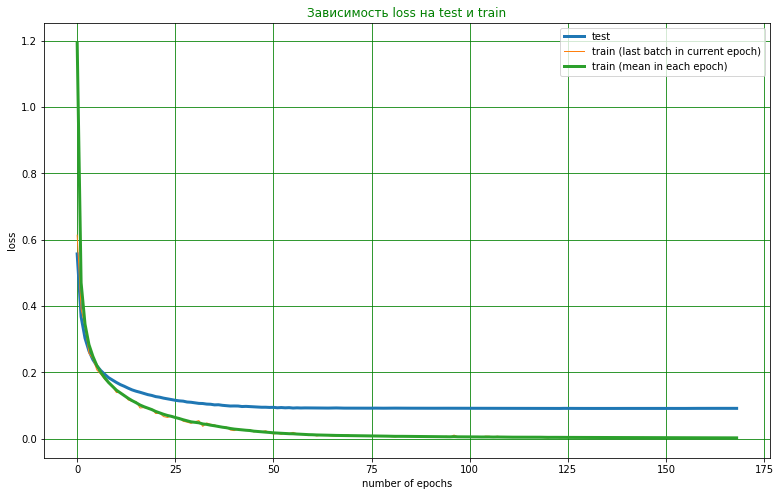

In [0]:
plt.figure(facecolor="white", num="red")
# plt.plot(test_accuracy_history, label="Adam")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.grid(True, color='green')
plt.title("Зависимость loss на test и train", color='green')
plt.plot(test_loss_history, label="test", linewidth=3);
plt.plot(train_loss_history, label="train (last batch in current epoch)", linewidth=1);
plt.plot(train_loss_mean_in_batch_history, label="train (mean in each epoch)", linewidth=3);
plt.legend(loc='upper right');

In [0]:

print(torch.max(X_train))

print(torch.min(X_train))



tensor(255.)
tensor(0.)


In [0]:
from PIL import Image

In [0]:
img=Image.open('../5.tif').convert('L')

SyntaxError: ignored

In [0]:
 ![title](C:\Users\ImageTest\5.tif "ShowMyImage") 

/bin/bash: -c: line 0: syntax error near unexpected token `C:\Users\ImageTest\5.tif'
/bin/bash: -c: line 0: `[title](C:\Users\ImageTest\5.tif "ShowMyImage") '
